# Pricing under RI with Endogenous Feedback

This example solves a pricing problem under rational inattention **with** endogenous feedback using the [DRIPs](https://github.com/afrouzi/DRIPs.jl) package.

See [Afrouzi and Yang (2020)](http://www.afrouzi.com/dynamic_inattention.pdf) for background on the theory.
Include the solver and import packages for plots and performance:

## Contents
* Setup
    * Problem
    * Matrix Notation
* Initialization
    * Assign Parameters
    * A Function for Finding the Fixed Point
* Solution
* IRFs
* Measure Performance

## Setup
### Problem
Suppose now that there is general equilibrium feedback with the degree of strategic complementarity $\alpha$: $$p_{i,t}^*=(1-\alpha)q_t+\alpha p_t$$ where
$$
\begin{aligned}
    \Delta q_t&=\rho \Delta q_{t-1}+u_t,\quad u_t\sim \mathcal{N}(0,\sigma_u^2) \\
    p_t&\equiv \int_0^1 p_{i,t}di
\end{aligned}
$$
Note that now the state space representation for $p_{i,t}^*$ is no longer exogenous and is determined in the equilibrium. However, we know that this is a Guassian process and by Wold's theorem we can decompose it to its $MA(\infty)$ representation:
$$
\begin{aligned}
    p_{i,t}^*=\Phi(L)u_t
\end{aligned}
$$
where $\Phi(.)$ is a lag polynomial and $u_t$ is the shock to nominal demand. Here, we have basically guessed that the process for $p_{i,t}^*$ is determined uniquely by the history of monetary shocks which requires that rational inattention errors of firms are orthogonal (See [Afrouzi, 2020](http://www.afrouzi.com/strategic_inattetion.pdf)). Our objective is to find $\Phi(.)$.

Since we cannot put $MA(\infty)$ processes in the computer, we approximate them with truncation. In particular, we know for stationary processes, we can arbitrarily get close to the true process by truncating $MA(\infty)$ processes to $MA(T)$ processes. Our problem here is that $p_{i,t}^*$ has a unit root and is not stationary. We can bypass this issue by re-writing the state space in the following way:
$$
\begin{aligned}
    p_{i,t}^*=\phi(L)\tilde{u}_t,\quad \tilde{u}_t=(1-L)^{-1}u_t =\sum_{j=0}^\infty u_{t-j}
\end{aligned}
$$
here $\tilde{u}_{t-j}$ is the unit root of the process and basically we have differenced out the unit root from the lag polynomial, and $\phi(L)=(1-L)\Phi(L)$. Notice that since the original process was difference stationary, differencing out the unit root means that $\phi(L)$ is now in $\ell_2$, and the process can now be approximated arbitrarily precisely with truncation.

### Matrix Notation

For a length of truncation $L$, let $\vec{x}_t\equiv (\tilde{u}_t,\tilde{u}_{t-1},\dots,\tilde{u}_{t-(L+1)})\in\mathbb{R}^L$. Then, note that $p_{i,t}^*\approx \mathbf{H} '\vec{x}_{t}$ where $\mathbf{H}\in \mathbb{R}^L$ is the truncated matrix analog of the lag polynominal, and is endogenous to the problem. Our objective is to find the general equilibrium $\mathbf{H}$ along with the optimal information structure that it implies.

Moreover, note that $$q_t=\mathbf{H}_q'\vec{x}_t,\quad \mathbf{H}_q'=(1,\rho,\rho^2,\dots,\rho^{L-1})$$

We will solve for $\phi$ by iterating over the problem. In particular, in iteration $n\geq 1$, given the guess $\mathbf{H}_{(n-1)}$, we have the following state space representation for the firm's problem
$$
\begin{aligned}
   \vec{x}_{t}&
    = \underset{\mathbf{A}}{\underbrace{\left[\begin{array}{ccccc}
        1 & 0 & \dots & 0 & 0\\
        1 & 0 & \dots & 0 & 0\\
        0 & 1 & \dots & 0 & 0\\
        \vdots & \vdots & \ddots & \vdots & \vdots\\
        0 & 0 & \dots & 1 & 0
        \end{array}\right]}}\, \vec{x}_{t-1}
    + \underset{\mathbf{Q}}{\underbrace{\left[\begin{array}{c}
        \sigma_u\\
        0\\
        0\\
        \vdots\\
        0
        \end{array}\right]}}\, u_t, \\
        p_{i,t}^*&=\mathbf{H}_{(n-1)}'\vec{x}_{t}
\end{aligned}
$$

Then we can solve the rational inattention problem of all firms and get the new guess for $p_t^*$:
$$
\begin{aligned}
    p_t^* & = (1-\alpha)q_t + \alpha p_t \\
      & = (1-\alpha)\sum_{j=0}^\infty \alpha^j q_t^{(j)},  \\
      q_{t}^{(j)}&\equiv \begin{cases}
q_{t} & j=0\\
\int_{0}^{1}\mathbb{E}_{i,t}[q_{t}^{(j-1)}]di & j\geq1
\end{cases}
\end{aligned}
$$

where $q_t^{(j)}$ is the $j$'th order belief of firms, on average, of $q_t$. Now, we need to write these higher order beliefs in terms of the state vector. Suppose, for a given $j$, there exists $\mathbf{X}_j\in \mathbb{R}^{L\times L}$ such that
$$
\begin{aligned}
q_t^{(j)} = \mathbf{H}_q'\mathbf{X}_j \vec{x}_t
\end{aligned}
$$
This clearly holds for $j=0$ with $\mathbf{X}_0=\mathbf{I}$.

Now, note that
$$
\begin{aligned}
    q_{t}^{(j+1)} &= \int_{0}^{1}\mathbb{E}_{i,t}[q_{t}^{(j)}]di \\
                  &= \mathbf{H}_{q}'\mathbf{X}_{j}\int_{0}^{1}\mathbb{E}_{i,t}[\vec{x}_{t}]di \\
                  &= \mathbf{H}_{q}'\mathbf{X}_{j}\sum_{j=0}^{\infty}[(\mathbf{I}-\mathbf{K}_{(n)}\mathbf{Y}'_{(n)})\mathbf{A}]^{j}\mathbf{K}_{(n)}\mathbf{Y}'_{(n)}\vec{x}_{t-j} \\
                  &\approx\underset{\equiv\mathbf{X}_{(n)}}{\mathbf{H}_{q}'\mathbf{X}_{j}\underbrace{\left[\sum_{j=0}^{\infty}[(\mathbf{I}-\mathbf{K}_{(n)}\mathbf{Y}'_{(n)})\mathbf{A}]^{j}\mathbf{K}_{(n)}\mathbf{Y}'_{(n)}\mathbf{M}'^{j}\right]}}\vec{x}_{t}=\mathbf{H}_{q}'\mathbf{X}_{j}\mathbf{X}_{(n)}\vec{x}_{t}
\end{aligned}
$$
where the $(n)$ subscripts refer to the solution of the RI problem in the $(n)$'th iteration. Note that this implies
$$
\begin{aligned}
\mathbf{X}_{j}=\mathbf{X}_{(n)}^j,\forall j\geq 0 \Rightarrow q_t^{(j)}=\mathbf{X}_{(n)}^{j}\vec{x}_t
\end{aligned}
$$

This gives us an updated guess for $\mathbf{H}$:
$$
\begin{aligned}
    p_t^*&=(1-\alpha)\mathbf{H}_q'\underset{\equiv \mathbf{X}_{p,(n)}}{\underbrace{\left[\sum_{j=0}^\infty \alpha^j \mathbf{X}_{(n)}^j\right]}} \vec{x}_t \\
        &\Rightarrow \mathbf{H}_{(n)} =  (1-\alpha)\mathbf{X}_{p,(n)}'\mathbf{H}_q
\end{aligned}
$$
We iterate until convergence of $\mathbf{H}_{(n)}$.

## Initialization
Include the package:

In [1]:
using DRIPs;

### Assign Parameters

In [2]:
ρ   = 0.6;        #persistence of money growth
σ_u = 0.1;        #std. deviation of shocks to money growth
α   = 0.8;        #degree of strategic complementarity
L   = 40;         #length of truncation
Hq  = ρ.^(0:L-1); #state-space rep. of Δq

Specifying the primitives of the DRIP:

In [3]:
using LinearAlgebra;
ω   = 0.2;
β   = 0.99;
A   = [1 zeros(1,L-2) 0; Matrix(I,L-1,L-1) zeros(L-1,1)];
Q   = [σ_u; zeros(L-1,1)];

### A Function for Finding the Fixed Point

Let us now define a function that solves the GE problem and returns the solution in a `Drip` structure:

In [4]:
function ge_drip(ω,β,A,Q,          #primitives of drip except for H because H is endogenous
                 α,                #strategic complementarity
                 Hq,               #state space rep. of Δq
                 L;                #length of truncation
                 H0       = Hq,    #optional: initial guess for H (Hq is the true solution when α=0)
                 maxit    = 200,   #optional: max number of iterations for GE code
                 tol      = 1e-4)  #optional: tolerance for iterations
    err   = 1;
    iter  = 0;
    M     = [zeros(1,L-1) 0; Matrix(I,L-1,L-1) zeros(L-1,1)];
    while (err > tol) & (iter < maxit)
            if iter == 0
                global ge  = Drip(ω,β,A,Q,H0, w = 0.9);
            else
                global ge  = Drip(ω,β,A,Q,H0;Ω0 = ge.ss.Ω ,Σ0 = ge.ss.Σ_1,maxit=15);
            end

            XFUN(jj) = ((I-ge.ss.K*ge.ss.Y')*ge.A)^jj * (ge.ss.K*ge.ss.Y') * (M')^jj
            X = DRIPs.infinitesum(XFUN; maxit=L, start = 0);  #E[x⃗]=X×x⃗

            XpFUN(jj) = α^jj * X^(jj)
            Xp = DRIPs.infinitesum(XpFUN; maxit=L, start = 0);

            H1 = (1-α)*Xp'*Hq;
            err= 0.5*norm(H1-H0,2)/norm(H0)+0.5*err;
            H0 = H1;

            iter += 1;
            if iter == maxit
                print("GE loop hit maxit\n")
            end
            println("Iteration $iter. Difference: $err")
    end
    return(ge)
end;

## Solution
Solve for benchmark parameterization:

In [5]:
using Suppressor; # suppresses printing of function. comment to see convergence details
@time @suppress  ge = ge_drip(ω,β,A,Q,α,Hq,L); # remove suppress to see convergence log

  0.376908 seconds (303.26 k allocations: 319.417 MiB, 9.06% gc time)


## IRFs
Get IRFs:

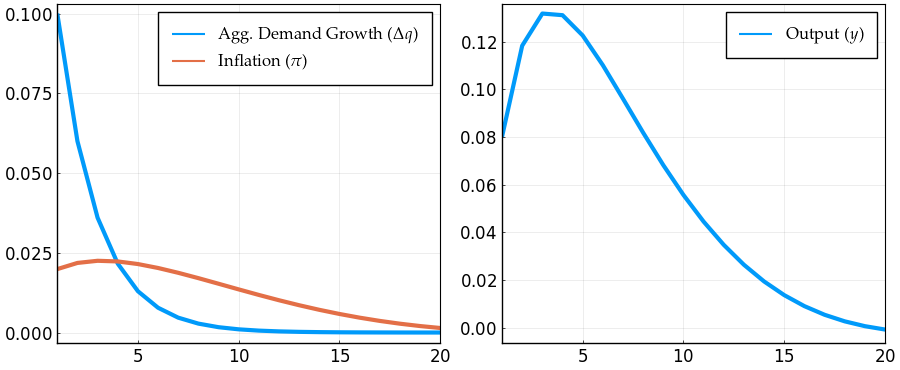

In [6]:
geirfs = irfs(ge,T = L)

M  = [zeros(1,L-1) 0; Matrix(I,L-1,L-1) zeros(L-1,1)]; # shift matrix
dq = diagm(Hq)*geirfs.x[1,1,:];                        # change in nominal demand
Pi = (I-M)*geirfs.a[1,1,:];                            # inflation
y  = inv(I-M)*(dq-Pi);                                 # output

using Plots, LaTeXStrings; pyplot();
p1 = plot(1:L,[dq,Pi],
     label = [L"Agg. Demand Growth ($\Delta q$)" L"Inflation ($\pi$)"]);

p2 = plot(1:L,y,
     label  = L"Output ($y$)");

plot(p1,p2,
    layout     = (1,2),
    xlim       = (1,20),
    lw         = 3,
    legend     = :topright,
    legendfont = font(12),
    tickfont   = font(12),
    size       = (900,370),
    framestyle = :box)

## Measure Performance

Solve and measure performance for random values of $\omega$:

In [7]:
using BenchmarkTools;
@suppress @benchmark ge_drip(ω,β,A,Q,α,Hq,L) setup = (ω=rand()) # solves and times the fixed point for different values of ω

BenchmarkTools.Trial: 
  memory estimate:  282.72 MiB
  allocs estimate:  34098
  --------------
  minimum time:     194.207 ms (2.63% GC)
  median time:      200.155 ms (5.08% GC)
  mean time:        200.345 ms (3.88% GC)
  maximum time:     208.894 ms (2.45% GC)
  --------------
  samples:          25
  evals/sample:     1

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*